# Module 3: Data Analytics With Python - Applied Statistics 

## Lab 1: Case Study: Exploratory Data Analytics (EDA)


<br><br><br>

### What is EDA? 
***

Exploratory Data Analysis refers to the critical process of performing initial investigations on data to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. 

It is a good practice to understand the data first and try to gather as many insights as possible from it. EDA is all about making sense of data in hand, before getting them dirty with it. 

EDA helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions. 

 

<br><br><br><br><br><br>
### Objective
***

* Performing Exploratory Data Analysis
* Exploratory Data Analysis
  * General information on the dataset
  * Univariate Analysis
  * Bivariate Analysis
  * Multivariate Analysis
  * Conclusion

<br><br><br><br><br><br>
## Case Study: IRIS dataset
***

<br><br><br><br><br><br>
###  Exploratory Analytics
***

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes **three iris species** with **50 samples** each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

**Dataset**

* the **ID** column
* 4 columns of measures on Sepal and Petal : **SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm**
* the column containing the labels : **Iris-setosa, Iris-versicolor, Iris-virginica**

We are going to perform an **exploratory data analysis** to understand the data and choose the best features. 

#### What will we do?
***
<br><br><br>
Observe the data.
1. Look out for missing values and outliers. 
2. Perform Descriptive Analysis
3. Perform univariate, bivariate, and multivariate analysis. 
4. We will use swarm plots, box plots, histograms and KDEs. 

In [1]:
# Importing Data processing libraries
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

# Plotting Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# Reading Data
# Download the dataset from here - 
# https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module3/iris_data.csv
url = "https://raw.githubusercontent.com/bluedataconsulting/AIMasteryProgram/main/Lab_Exercises/Module3/iris_data.csv"
#data = pd.read_csv(url)
iris=pd.read_csv(url)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Confirming the number of records for each species
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<br><br><br><br><br><br>
### Exploratory Data Analysis
***

### General information on the dataset
***

In [5]:
# Viewing Data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Shape of Data
iris.shape

(150, 5)

In [7]:
# Finding null count
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Descriptive analysis
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<br><br><br><br><br><br>
### Univariate Analysis
***

In [9]:
# Distinct Species values
iris["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# Dividing data
setosa = iris.loc[iris['class'] == "Iris-setosa"]
versicolor = iris.loc[iris['class'] == "Iris-versicolor"]
virginica = iris.loc[iris['class'] == "Iris-virginica"]

In [11]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

**'sepal_length', 'sepal_width', 'petal_length', 'petal_width'**

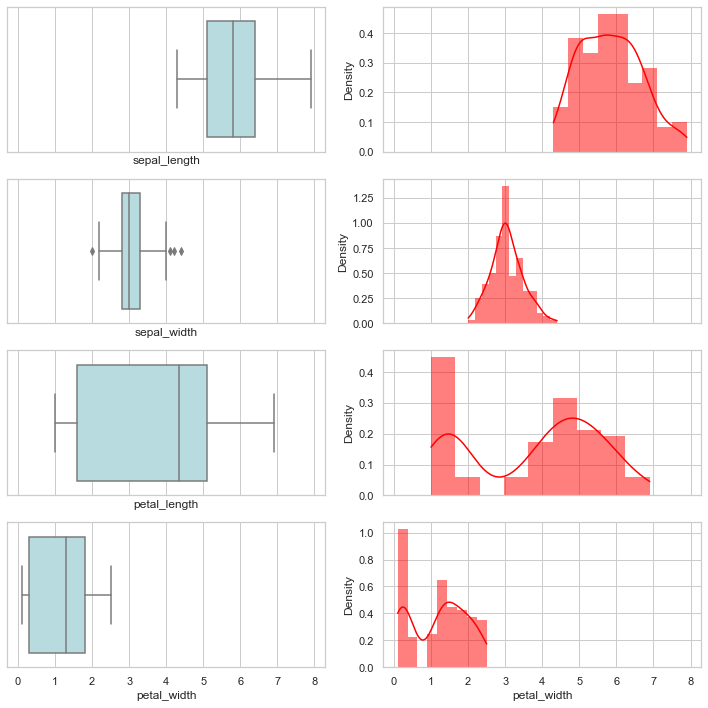

In [12]:
# Setting up subplots
f,axes=plt.subplots(ncols=2,nrows=4,figsize=(10,10),sharex=True)
l=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in range(4):
    
    #Ploting the boxplot
    sns.boxplot(x = iris.loc[:,l[i]], ax=axes[i][0], color='powderblue')
    
    # Ploting the KDE
    sns.histplot(data=iris.loc[:,l[i]], color="red", kde=True, stat="density", linewidth=0, ax=axes[i][1])  
    
    plt.tight_layout()

<br><br><br><br><br><br>
### Bivariate Data Analysis
***

- sepal_length vs class
- sepal_width vs class 
- petal_length vs class
- petal_width vs class

#### sepal_length vs class

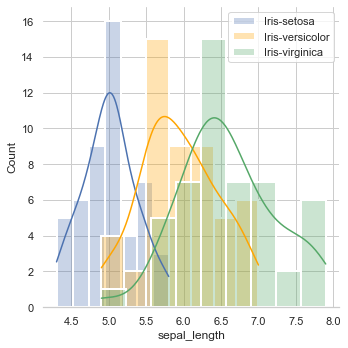

In [13]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)

# Ploting the histogram with KDE

sns.histplot(data=setosa["sepal_length"],label="Iris-setosa",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=versicolor["sepal_length"],label="Iris-versicolor",kde=True,color='orange',linewidth=2,alpha=0.3)
sns.histplot(data=virginica["sepal_length"],label="Iris-virginica",kde=True,color='g',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

#### - sepal_width vs class

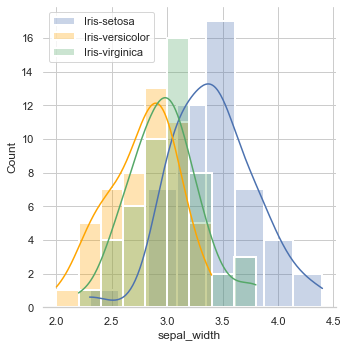

In [14]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)
sns.histplot(data=setosa["sepal_width"],label="Iris-setosa",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=versicolor["sepal_width"],label="Iris-versicolor",kde=True,color='orange',linewidth=2,alpha=0.3)
sns.histplot(data=virginica["sepal_width"],label="Iris-virginica",kde=True,color='g',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

<br><br><br>
### Multivariate Analysis
***

#### All species vs All Species

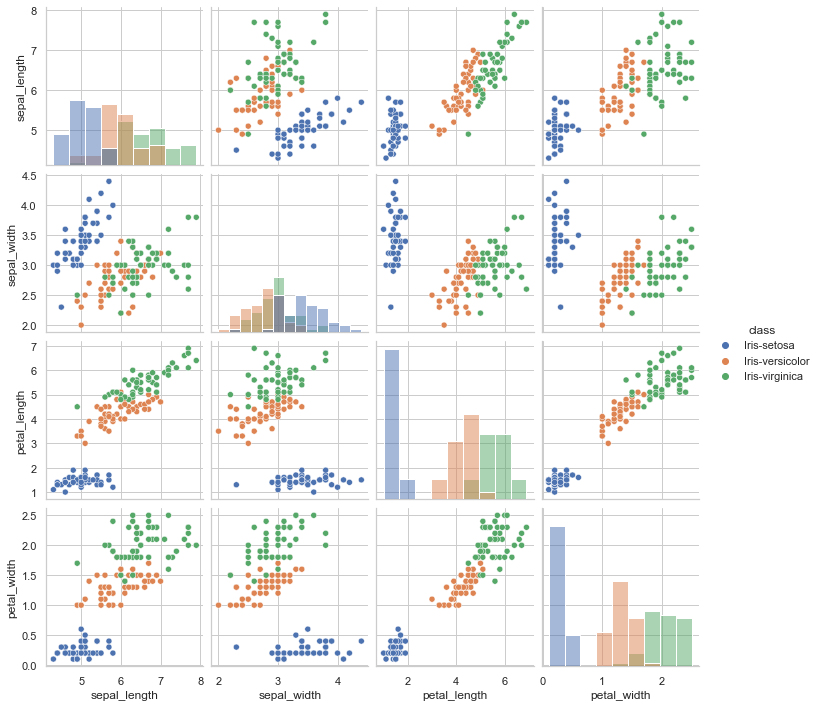

In [15]:
sns.pairplot(iris, hue="class", diag_kind="hist")
plt.show()

#### Plotting Swarm and Box Plots

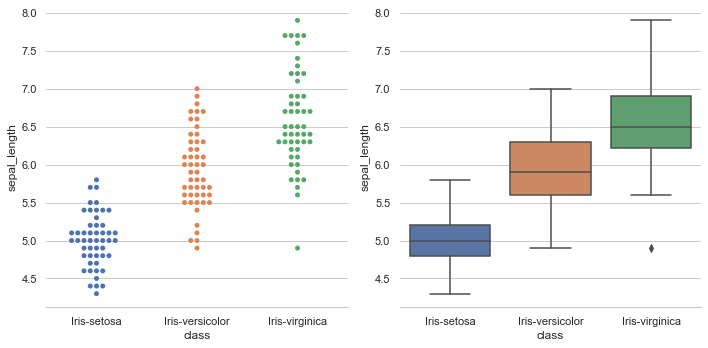

In [16]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=iris['class'], y=iris['sepal_length'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=iris['class'], y=iris['sepal_length'], ax=axes[1])

plt.tight_layout()

<br>
#### **Conclusion:**
According to these different plots, the sepal length seems to be quite an interesting feature to use in order to classify the different species. We can inder that -
- the sepal length of Iris-setosa flowers is mainly smaller than the sepal length of the two other species.
- even if the difference of sepal length is less clear between Iris-versicolor and Iris-virginica, the sepal length of Iris-versicolor flowers is mainly smaller than the sepal length of Iris-virginica flowers.
- There do exist some records of species Iris-Virginica that behave differently from the norm when sepal length is concerned(these are the outliers).
<br><br><br>

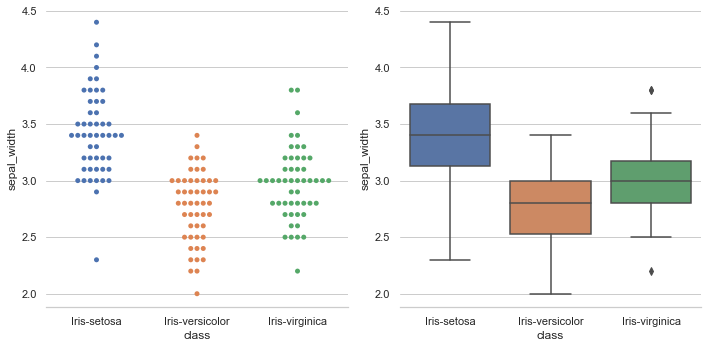

In [17]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=iris['class'], y=iris['sepal_width'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=iris['class'], y=iris['sepal_width'], ax=axes[1])

plt.tight_layout()

<br>
#### **Conclusion:**

According to these different plots, the sepal width seems to be the less interesting feature to use in order to classify the different species. We can infer that: 
- the sepal width of the Iris-setosa flowers seems to be larger than the sepal width of Iris-versicolor and Iris-virginica but for many samples this difference of size is not true
- the sepal width of the Iris-virginica flowers seems to be larger than the sepal width of Iris-versicolor but for many samples this difference of size is not true
- There do exist some records of species Iris-Virginica that behave differently from the norm when sepal width is concerned(these are the outliers).
<br><br><br>

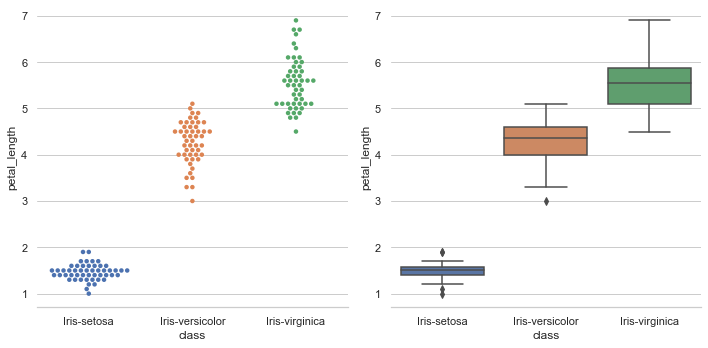

In [18]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=iris['class'], y=iris['petal_length'], ax=axes[0] ,size=4.5)

# Plot the Boxplot
sns.boxplot(x=iris['class'], y=iris['petal_length'], ax=axes[1])

plt.tight_layout()

<br>
#### **Conclusion:**

According to these different plots, the petal length seems to be an interesting feature to use in order to classify the different species. We can infer that: 
- the petal length of Iris-setosa flowers is clearly smaller than the petal length of the two other species
- even if the difference of petal length is less clear between Iris-versicolor and Iris-virginica, the petal length of Iris-versicolor flowers is mainly smaller than the petal length of Iris-virginica flowers
- There do exist some records of species setosa snd versicolor that behave differently from the norm when petal length is concerned(these are the outliers).
<br><br><br>

/home/wayan/miniconda3/envs/tf26p38gpu-riset/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


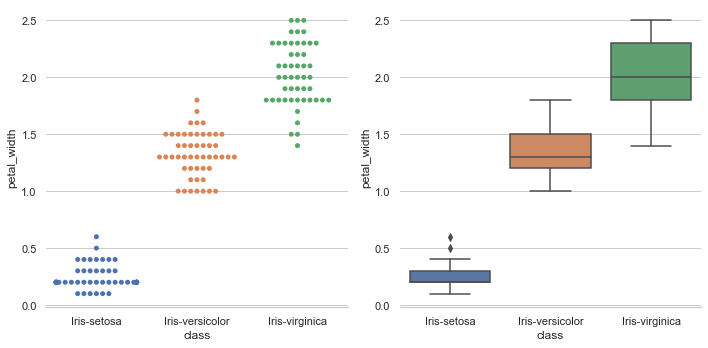

In [19]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10,5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=iris['class'], y=iris['petal_width'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=iris['class'], y=iris['petal_width'], ax=axes[1])

plt.tight_layout()

<br>

#### Conclusion:

According to these different plots, the petal width seems to be an interesting feature to use in order to classify the different species. Indeed : 
- the petal width of Iris-setosa flowers is clearly smaller than the petal width of the two other species
- even if the difference of petal width is less clear between Iris-versicolor and Iris-virginica, the petal width of Iris-versicolor flowers is mainly smaller than the petal width of Iris-virginica flowers
- There do exist some records of species setosa that behave differently from the norm when petal width is concerned(these are the outliers).
<br><br><br>

### End of EDA